In [4]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

In [2]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [3]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [4]:
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    
    all_images.sort()
    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

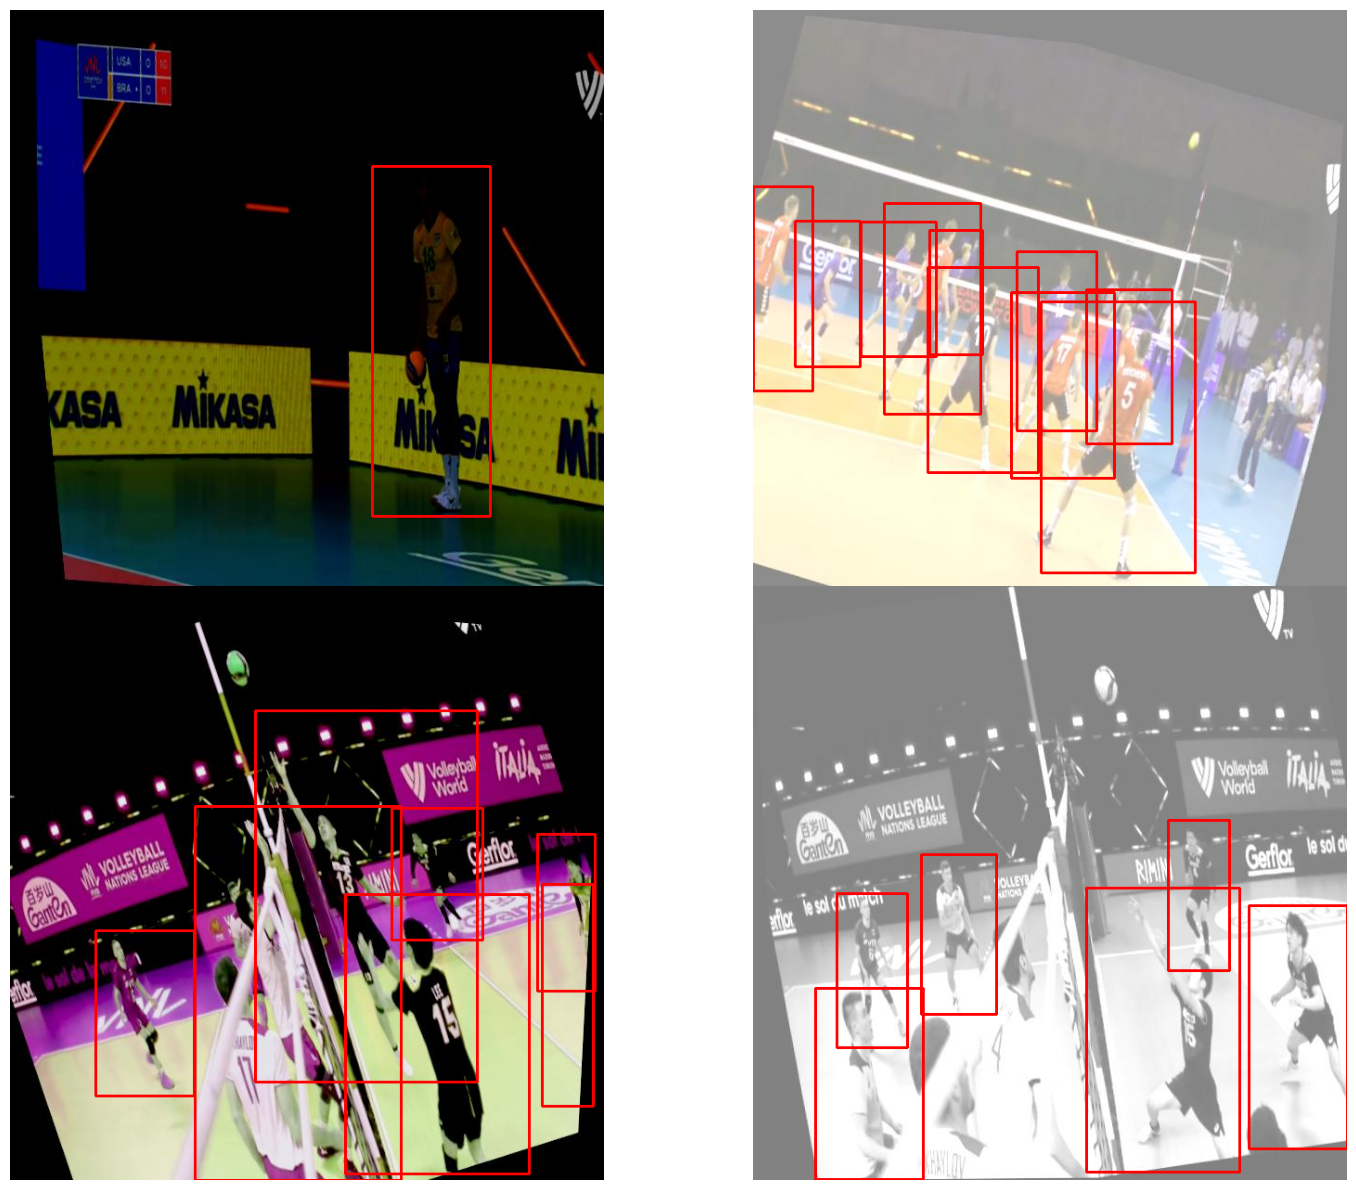

In [5]:
plot(
    image_paths='train/images/', 
    label_paths='train/labels/',
    num_samples=4,
)

In [6]:
EPOCHS = 50
!yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=data.yaml epochs={EPOCHS} batch=8 name=yolov8n_v8_50e

100%|██████████████████████████████████████| 6.23M/6.23M [00:01<00:00, 3.90MB/s]
New https://pypi.org/project/ultralytics/8.1.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.9.10 torch-2.2.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

In [1]:
!yolo task=detect \
mode=predict \
model=runs/detect/yV8_medium/weights/best.pt \
source=valid/images \
imgsz=640 \
name=yolov8n_v8_50e_infer640 \
show_labels=True

Ultralytics YOLOv8.0.196 🚀 Python-3.9.10 torch-2.2.0 CPU (Apple M1)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/60 /Users/yashwanthponugoti/Documents/Player_detection/valid/images/volley-1-_png.rf.842aa76312bebffd49cb66b65a426cb4.jpg: 640x640 12 players, 350.4ms
image 2/60 /Users/yashwanthponugoti/Documents/Player_detection/valid/images/volley-10-_png.rf.8e9740f8180e14cac0080d87c44825e7.jpg: 640x640 14 players, 316.2ms
image 3/60 /Users/yashwanthponugoti/Documents/Player_detection/valid/images/volley-102-_png.rf.f06a08569df1b381719707ccd3a2876c.jpg: 640x640 6 players, 317.9ms
image 4/60 /Users/yashwanthponugoti/Documents/Player_detection/valid/images/volley-11-_png.rf.bbe441961660d78fee6ab926c081d915.jpg: 640x640 14 players, 284.9ms
image 5/60 /Users/yashwanthponugoti/Documents/Player_detection/valid/images/volley-114-_png.rf.d11647bcae05fb83c352a4eaa2fe298e.jpg: 640x640 16 players, 280.2ms
image 6/60 /Users/yashwanthponugoti/Documents/Pl

In [2]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

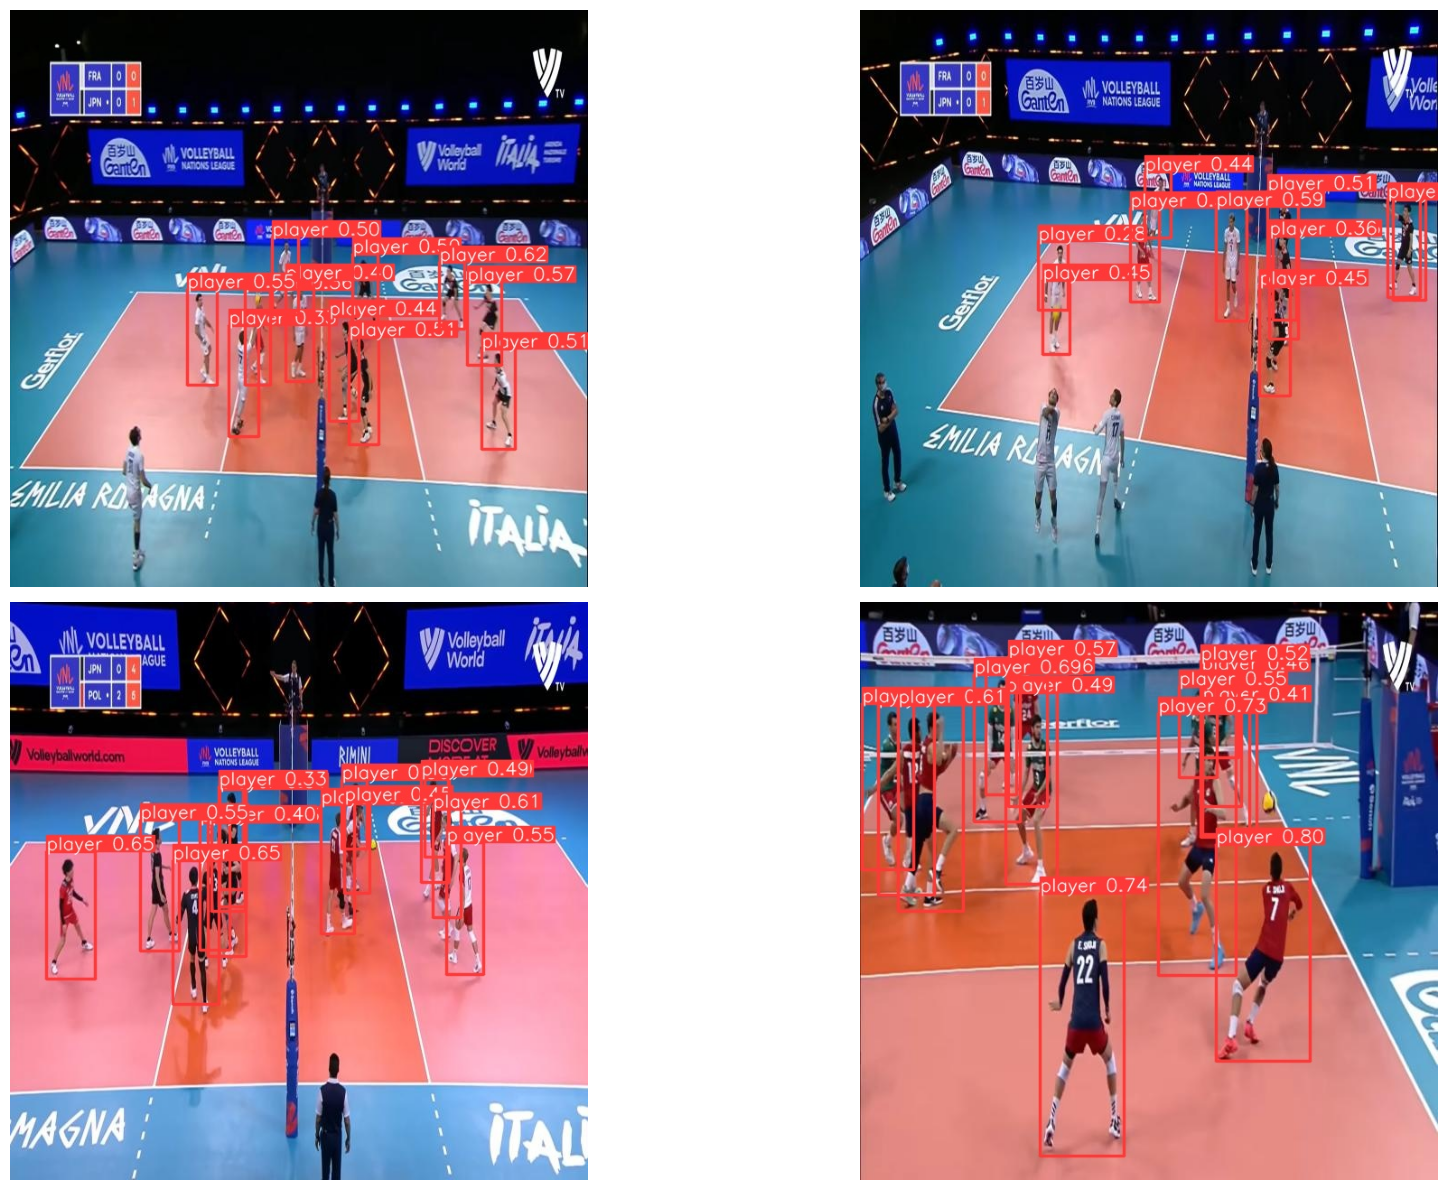

In [5]:
visualize('runs/detect/yolov8n_v8_50e_infer640/')